In [1]:
import os
import pandas as pd
pd.options.display.max_rows = 1000
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import seaborn as sns; sns.set(color_codes=True)

import sys
sys.getrecursionlimit()
sys.setrecursionlimit(10000)

import numpy as np
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

from collections import defaultdict


#### Reading Table of Fluxes

In [2]:
Xam_void_fluxes = pd.read_csv('Xam_cluster-void.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'Void'])
Xam_rpfCGH_fluxes = pd.read_csv('Xam_cluster-rpfCGH.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'rpfCGH'])

Xam_void_xanth_fluxes = pd.read_csv('Xam_cluster_void_Xanth.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'Void_Xanthan'])
Xam_rpfCGH_xanth_fluxes = pd.read_csv('Xam_cluster_rpfCGH_Xanth.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'rpfCGH_Xanthan'])

In [3]:
xam_fluxes = pd.concat([Xam_void_fluxes, Xam_rpfCGH_fluxes, Xam_void_xanth_fluxes, Xam_rpfCGH_xanth_fluxes], axis=1, join='inner')
xam_fluxes_2 = xam_fluxes.fillna(value=0)
xam_fluxes_2 = xam_fluxes_2[(xam_fluxes_2.T != 0).any()]

In [4]:
#xam_fluxes_2

In [5]:
xam_fluxes_2.to_csv('Xam_results.csv')

#### Calculating Linkage Matrix

In [6]:
xam_fluxes_array = xam_fluxes_2.values
xam_fluxes_array.shape
Z = linkage(xam_fluxes_array, metric='euclidean', method='ward',)
c, coph_dists = cophenet(Z, pdist(xam_fluxes_array))
c

0.9248424873564697

#### Calculating Full Dendrogram

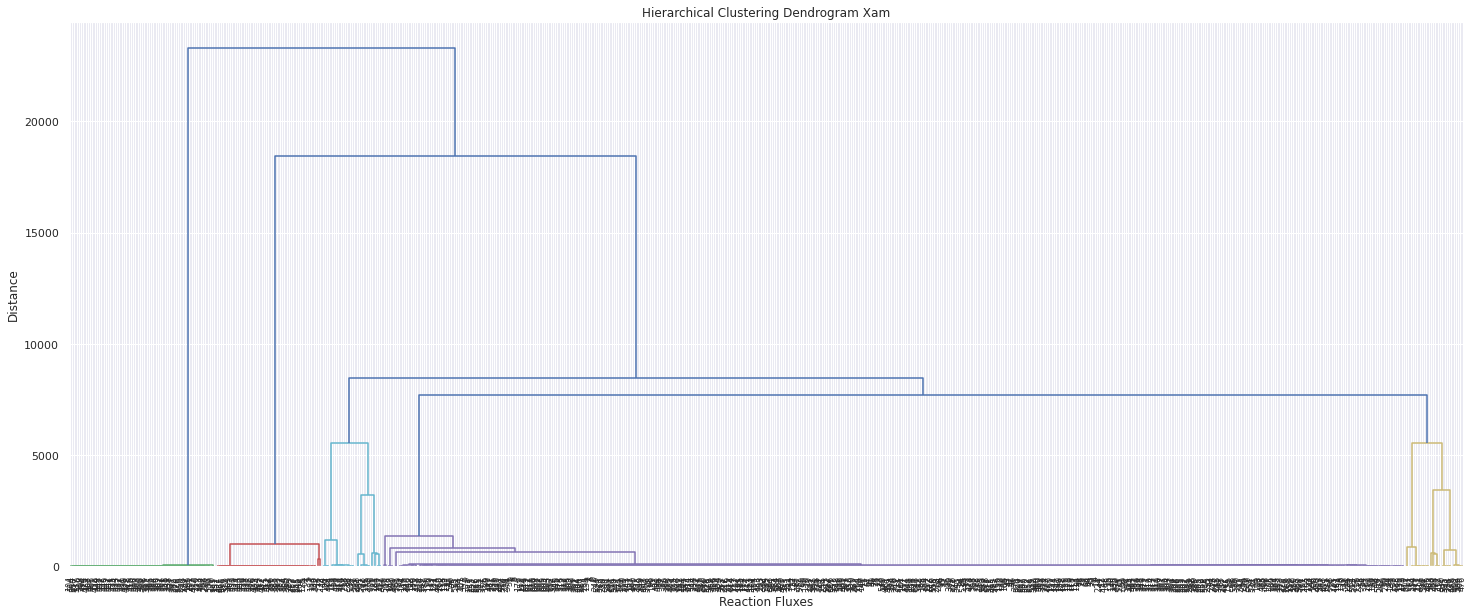

In [7]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Xam')
plt.xlabel('Reaction Fluxes')
plt.ylabel('Distance')
den = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=0.25*max(Z[:,2]),
)

In [9]:
#plt.show(den)

#### Mapping Index and Reactions

In [8]:
xam_map_index = pd.read_csv('Xam_results.csv', sep=',', header=0, usecols=['rxn'])
xam_map_index.index.name = 'index'
#xam_map_index

#### Mapping Groups to Dataframe of Fluxes

In [9]:
#del df_groups
df_groups = pd.DataFrame.from_dict(den["ivl"], dtype=int)
df_groups['group'] = pd.DataFrame.from_dict(den["color_list"])
df_groups.set_index(0, inplace=True)
df_groups.index.name = 'index'
#df_groups

In [10]:
#del df_fluxes_groups
df_fluxes_groups = pd.concat([xam_map_index, df_groups], axis=1, join='inner')
df_fluxes_groups.set_index('rxn', inplace=True)
#df_fluxes_groups

In [11]:
xam_fluxes_groups = pd.concat([xam_fluxes_2, df_fluxes_groups], axis=1, join='inner')
#xam_fluxes_groups

In [12]:
xam_fluxes_groups.to_csv('Xam_results_grouped.csv')

#### Coloring

In [13]:
#Color palet
group_pal = sns.color_palette(n_colors=len(xam_fluxes_groups.group.unique())) #n_colors=len(xam_fluxes_groups.group.unique())
group_lut = dict(zip(xam_fluxes_groups.group.unique(), group_pal))
group = xam_fluxes_groups.group
#print(group)
group_colors = pd.Series(group).map(group_lut)
group_colors.index.names = ['Reactions']
#print(group_colors)

In [14]:
xam_fluxes_2.index.names = ['Reactions']

Text(218.09558823529412, 0.5, 'Flux values (Z-score)')

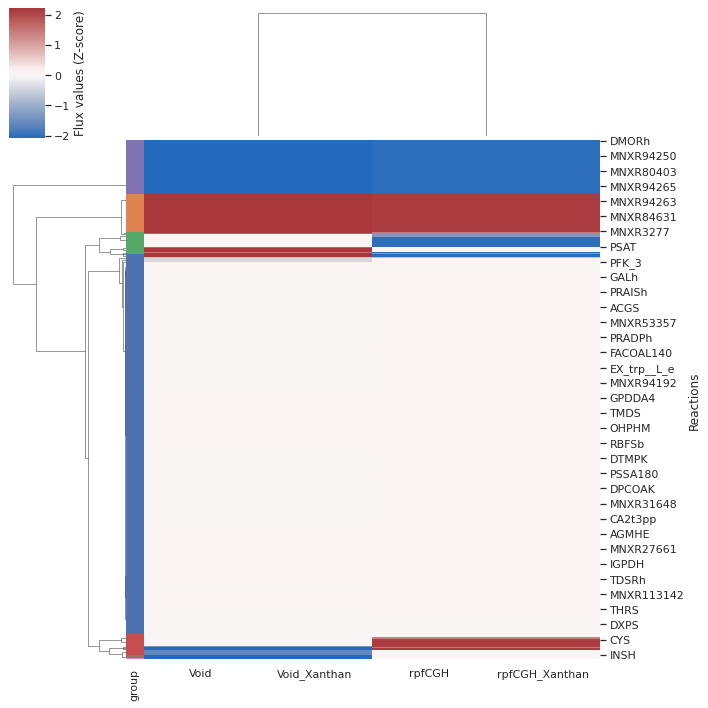

In [15]:
flux_distr_2 = sns.clustermap(xam_fluxes_2, z_score=1, row_linkage=Z, row_colors=group_colors, cmap='vlag')
plt.ylabel("Flux values (Z-score)")

In [16]:
plt.savefig("Xam-Hierarchically-clustered_heatmap-z_score-dendrogram_colored.png", format='png', dpi=800)

<Figure size 432x288 with 0 Axes>